<a href="https://colab.research.google.com/github/parmidamardi/CDM-MatrixMonitor-FP/blob/main/CDM%E2%80%91MatrixMonitor%E2%80%91FP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
%pip install pandas numpy matplotlib seaborn openpyxl mlxtend scikit-learn ucimlrepo


[notice] A new release of pip is available: 23.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer, load_diabetes, load_iris, fetch_openml

from ucimlrepo import fetch_ucirepo

from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA, FastICA, TruncatedSVD

from sklearn.feature_selection import SelectKBest, f_regression, chi2, RFE

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.cluster import KMeans

from sklearn.metrics import accuracy_score, f1_score, r2_score, mean_squared_error, silhouette_score


In [34]:
cancer = fetch_ucirepo(id=17)

X_cancer = cancer.data.features
y_cancer = cancer.data.targets

df_cancer = pd.concat([X_cancer, y_cancer], axis=1)

=== Breast Cancer Dataset ===
Shape: (569, 31)
Columns: ['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3', 'Diagnosis']
        radius1  texture1  perimeter1    area1  smoothness1  compactness1  \
count    569.00    569.00      569.00   569.00       569.00        569.00   
unique      NaN       NaN         NaN      NaN          NaN           NaN   
top         NaN       NaN         NaN      NaN          NaN           NaN   
freq        NaN       NaN         NaN      NaN          NaN           NaN   
mean      14.13     19.29       91.97   654.89         0.10          0.10   
std        3.52      4.30       2

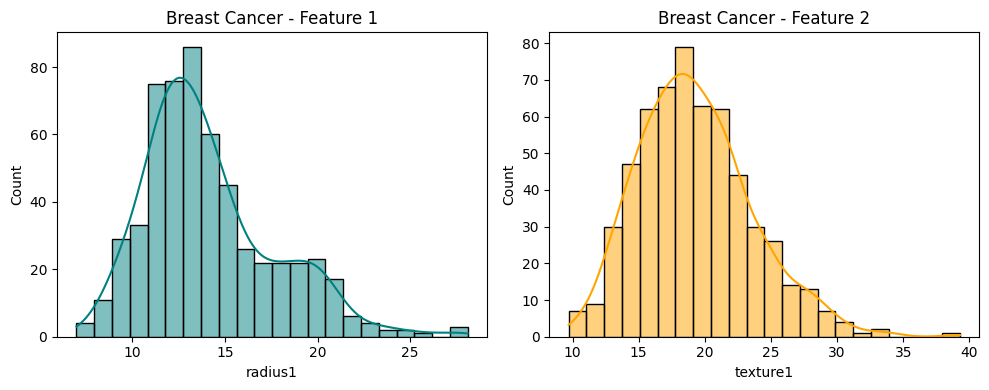

In [35]:
print("=== Breast Cancer Dataset ===")
print("Shape:", df_cancer.shape)
print("Columns:", list(df_cancer.columns))
print(df_cancer.describe(include='all').round(2), "\n")

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(df_cancer.iloc[:, 0], kde=True, color='teal')
plt.title("Breast Cancer - Feature 1")

plt.subplot(1, 2, 2)
sns.histplot(df_cancer.iloc[:, 1], kde=True, color='orange')
plt.title("Breast Cancer - Feature 2")

plt.tight_layout()
plt.show()

In [36]:
boston = fetch_openml(name="boston", version=1, as_frame=True)
df_boston = boston.frame


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


=== Boston Housing Dataset ===
Shape: (506, 14)
Columns: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
          CRIM      ZN   INDUS CHAS     NOX      RM     AGE     DIS  RAD  \
count   506.00  506.00  506.00  506  506.00  506.00  506.00  506.00  506   
unique     NaN     NaN     NaN    2     NaN     NaN     NaN     NaN    9   
top        NaN     NaN     NaN    0     NaN     NaN     NaN     NaN   24   
freq       NaN     NaN     NaN  471     NaN     NaN     NaN     NaN  132   
mean      3.61   11.36   11.14  NaN    0.55    6.28   68.57    3.80  NaN   
std       8.60   23.32    6.86  NaN    0.12    0.70   28.15    2.11  NaN   
min       0.01    0.00    0.46  NaN    0.38    3.56    2.90    1.13  NaN   
25%       0.08    0.00    5.19  NaN    0.45    5.89   45.02    2.10  NaN   
50%       0.26    0.00    9.69  NaN    0.54    6.21   77.50    3.21  NaN   
75%       3.68   12.50   18.10  NaN    0.62    6.62   94.07    5.19  NaN   
m

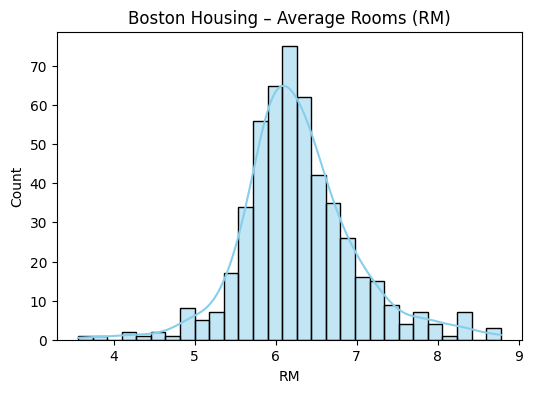

In [37]:
print("=== Boston Housing Dataset ===")
print("Shape:", df_boston.shape)
print("Columns:", list(df_boston.columns))
print(df_boston.describe(include='all').round(2), "\n")

plt.figure(figsize=(6, 4))
sns.histplot(df_boston["RM"], kde=True, color='skyblue')
plt.title("Boston Housing – Average Rooms (RM)")
plt.show()

In [38]:
iris = fetch_ucirepo(id=53)
X_iris = iris.data.features
y_iris = iris.data.targets
df_iris = pd.concat([X_iris, y_iris], axis=1)

=== Iris Dataset ===
Shape: (150, 5)
Columns: ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
        sepal length  sepal width  petal length  petal width        class
count         150.00       150.00        150.00       150.00          150
unique           NaN          NaN           NaN          NaN            3
top              NaN          NaN           NaN          NaN  Iris-setosa
freq             NaN          NaN           NaN          NaN           50
mean            5.84         3.05          3.76         1.20          NaN
std             0.83         0.43          1.76         0.76          NaN
min             4.30         2.00          1.00         0.10          NaN
25%             5.10         2.80          1.60         0.30          NaN
50%             5.80         3.00          4.35         1.30          NaN
75%             6.40         3.30          5.10         1.80          NaN
max             7.90         4.40          6.90         2.50        

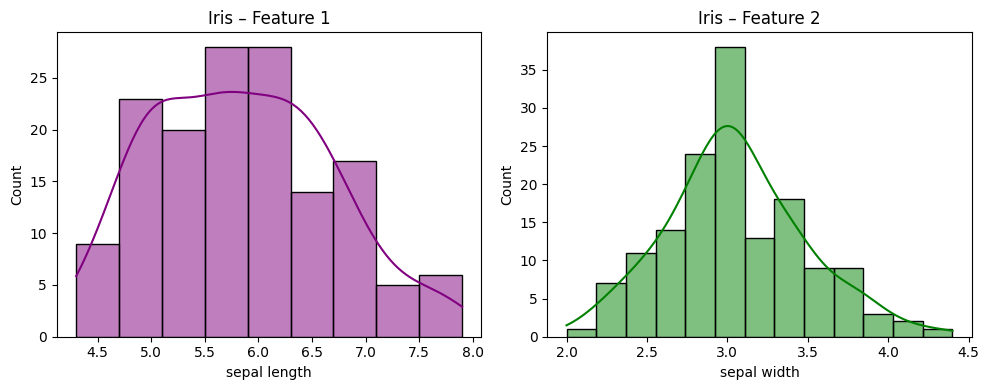

In [39]:
print("=== Iris Dataset ===")
print("Shape:", df_iris.shape)
print("Columns:", list(df_iris.columns))
print(df_iris.describe(include='all').round(2), "\n")

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(df_iris.iloc[:, 0], kde=True, color='purple')
plt.title("Iris – Feature 1")
plt.subplot(1, 2, 2)
sns.histplot(df_iris.iloc[:, 1], kde=True, color='green')
plt.title("Iris – Feature 2")
plt.tight_layout()
plt.show()

/var/folders/n0/439bn76s15lbf8y11cgpn7qm0000gn/T/ipykernel_2246/3527835499.py:9: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from current font.
  plt.tight_layout()
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


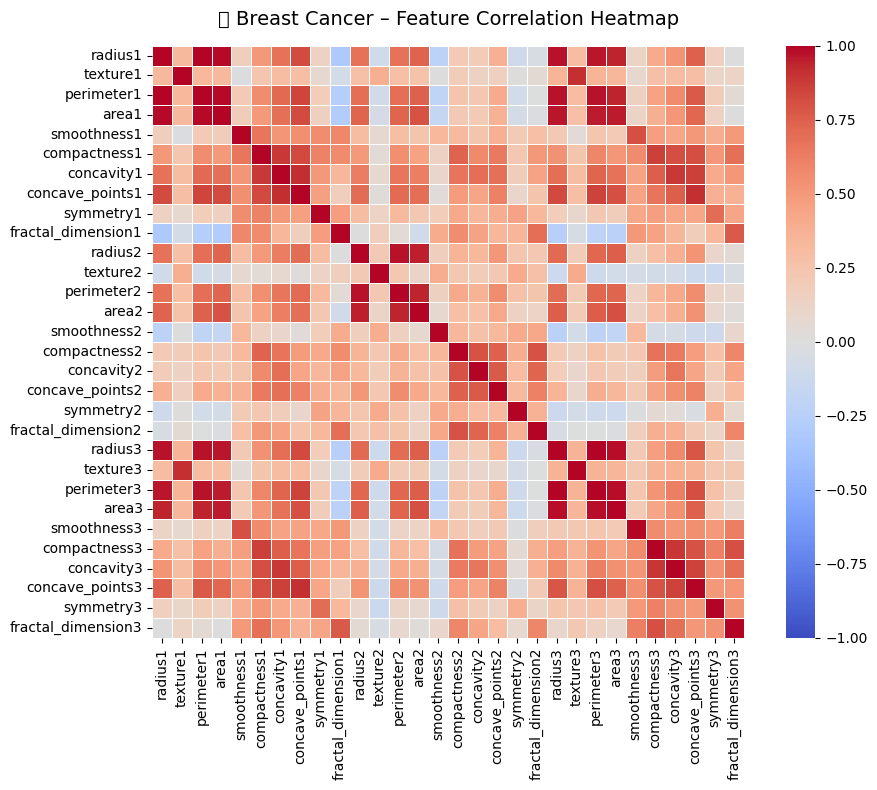

/var/folders/n0/439bn76s15lbf8y11cgpn7qm0000gn/T/ipykernel_2246/3527835499.py:9: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from current font.
  plt.tight_layout()
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


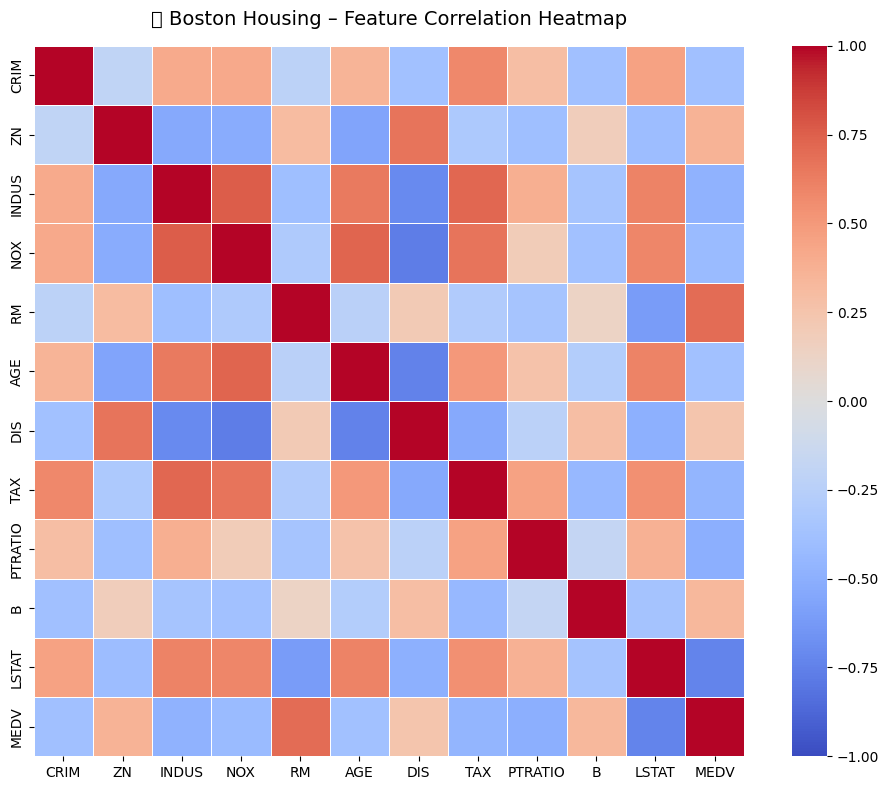

/var/folders/n0/439bn76s15lbf8y11cgpn7qm0000gn/T/ipykernel_2246/3527835499.py:9: UserWarning: Glyph 127800 (\N{CHERRY BLOSSOM}) missing from current font.
  plt.tight_layout()
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127800 (\N{CHERRY BLOSSOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


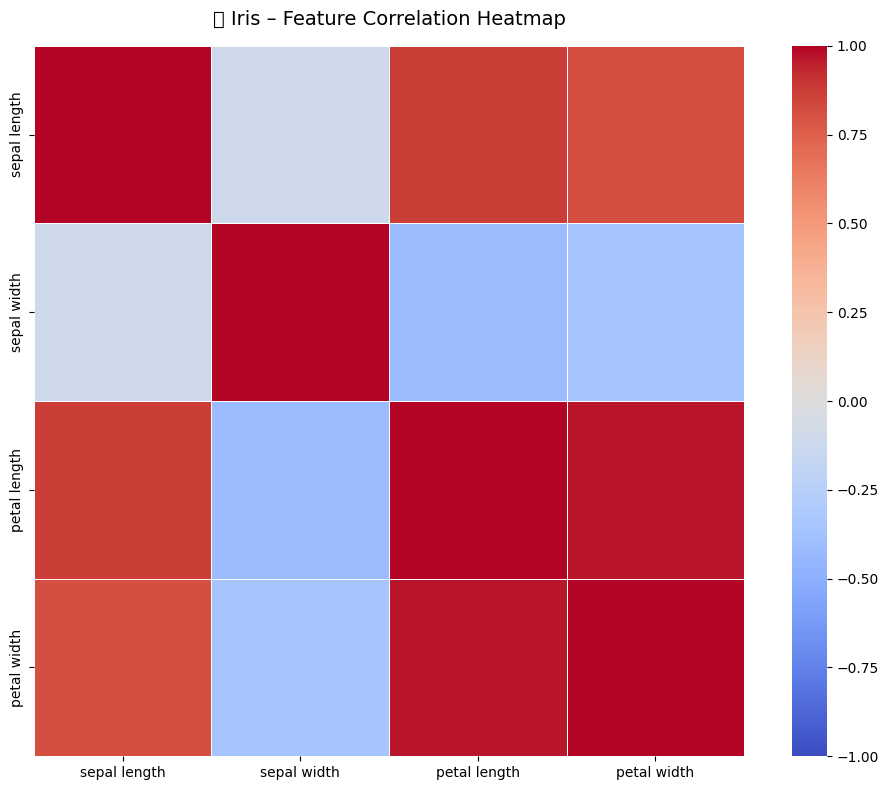

In [40]:
def plot_heatmap(df, title):
    plt.figure(figsize=(10, 8))
    numeric_df = df.select_dtypes(include=['float64', 'int64'])
    corr = numeric_df.corr()

    sns.heatmap(corr, cmap="coolwarm", annot=False, fmt=".2f", vmin=-1, vmax=1, square=True, linewidths=0.5)

    plt.title(title, fontsize=14, pad=15)
    plt.tight_layout()
    plt.show()


plot_heatmap(df_cancer, "🔬 Breast Cancer – Feature Correlation Heatmap")

plot_heatmap(df_boston, "🏠 Boston Housing – Feature Correlation Heatmap")

plot_heatmap(df_iris, "🌸 Iris – Feature Correlation Heatmap")


In [41]:
def run_dim_reduction(df, method_name, model):

    X = df.select_dtypes(include=['float64', 'int64']).copy()

    reduced = model.fit_transform(X)

    print(f"\n🔹 {method_name} for dataset ({df.shape[0]} samples, {X.shape[1]} numeric features):")
    if hasattr(model, "explained_variance_ratio_"):
        print("  Explained variance ratios:", np.round(model.explained_variance_ratio_, 4))
        print("  Cumulative explained variance:", np.round(model.explained_variance_ratio_.sum(), 4))
    else:
        print("  Explained variance not available (ICA)")
    print("  Output shape:", reduced.shape)
    return pd.DataFrame(reduced)


Breast Cancer

🔹 PCA for dataset (569 samples, 30 numeric features):
  Explained variance ratios: [0.982]
  Cumulative explained variance: 0.982
  Output shape: (569, 1)

🔹 ICA for dataset (569 samples, 30 numeric features):
  Explained variance not available (ICA)
  Output shape: (569, 3)

🔹 SVD for dataset (569 samples, 30 numeric features):
  Explained variance ratios: [0.9744 0.0217 0.0026]
  Cumulative explained variance: 0.9987
  Output shape: (569, 3)


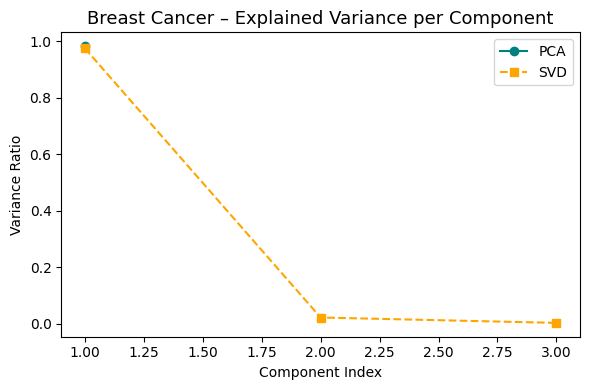


Boston Housing

🔹 PCA for dataset (506 samples, 12 numeric features):
  Explained variance ratios: [0.8045 0.163 ]
  Cumulative explained variance: 0.9675
  Output shape: (506, 2)

🔹 ICA for dataset (506 samples, 12 numeric features):
  Explained variance not available (ICA)
  Output shape: (506, 3)

🔹 SVD for dataset (506 samples, 12 numeric features):
  Explained variance ratios: [0.3629 0.6024 0.0216]
  Cumulative explained variance: 0.987
  Output shape: (506, 3)


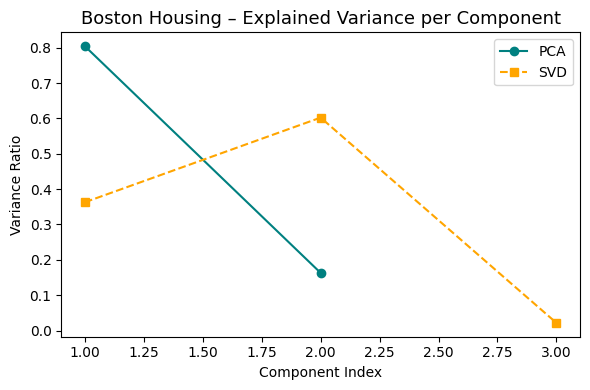


Iris

🔹 PCA for dataset (150 samples, 4 numeric features):
  Explained variance ratios: [0.9246 0.053 ]
  Cumulative explained variance: 0.9776
  Output shape: (150, 2)

🔹 ICA for dataset (150 samples, 4 numeric features):
  Explained variance not available (ICA)
  Output shape: (150, 3)

🔹 SVD for dataset (150 samples, 4 numeric features):
  Explained variance ratios: [0.5303 0.4469 0.0177]
  Cumulative explained variance: 0.9948
  Output shape: (150, 3)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


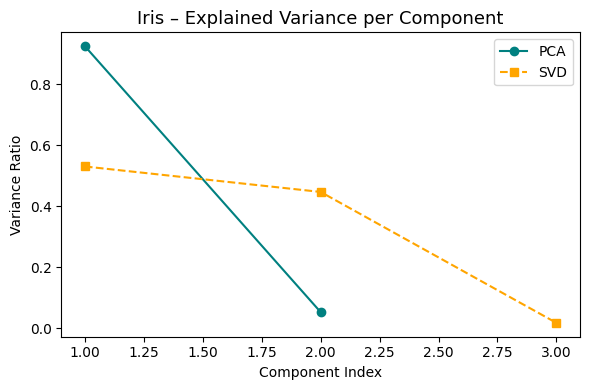

In [42]:
datasets = {
    "Breast Cancer": df_cancer,
    "Boston Housing": df_boston,
    "Iris": df_iris
}

for name, df in datasets.items():
    print(f"\n{'='*60}\n{name}")

    pca = PCA(n_components=0.95, random_state=42)
    df_pca = run_dim_reduction(df, "PCA", pca)

    n_comp = max(3, df_pca.shape[1])
    ica = FastICA(n_components=n_comp, random_state=42, max_iter=500)
    df_ica = run_dim_reduction(df, "ICA", ica)

    svd = TruncatedSVD(n_components=n_comp, random_state=42)
    df_svd = run_dim_reduction(df, "SVD", svd)


    plt.figure(figsize=(6, 4))
    plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
             pca.explained_variance_ratio_, "o-", label="PCA", color='teal')
    plt.plot(range(1, len(svd.explained_variance_ratio_) + 1),
             svd.explained_variance_ratio_, "s--", label="SVD", color='orange')

    plt.title(f"{name} – Explained Variance per Component", fontsize=13)
    plt.xlabel("Component Index")
    plt.ylabel("Variance Ratio")
    plt.legend()
    plt.tight_layout()
    plt.show()



Breast Cancer Dataset – Feature Selection Analysis

[SelectKBest] Selected 15 features:
  ['radius1', 'perimeter1', 'area1', 'compactness1', 'concavity1', 'concave_points1', 'radius2', 'perimeter2', 'area2', 'radius3', 'perimeter3', 'area3', 'compactness3', 'concavity3', 'concave_points3']


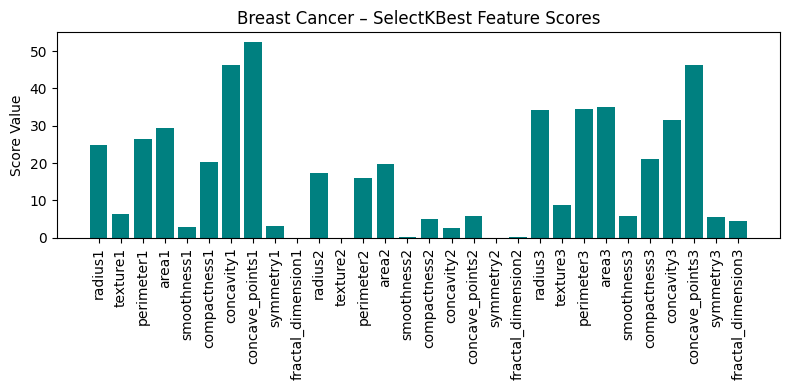

[RFE] Selected 15 features:
  ['perimeter1', 'area1', 'concavity1', 'concave_points1', 'fractal_dimension1', 'radius2', 'perimeter2', 'compactness2', 'radius3', 'texture3', 'perimeter3', 'area3', 'compactness3', 'concavity3', 'concave_points3']

Overlap between SelectKBest and RFE: 12 features
  ['perimeter2', 'radius2', 'concavity1', 'area1', 'compactness3', 'perimeter1', 'radius3', 'concave_points3', 'area3', 'concavity3', 'perimeter3', 'concave_points1']

Boston Housing Dataset – Feature Selection Analysis

[SelectKBest] Selected 6 features:
  ['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT']


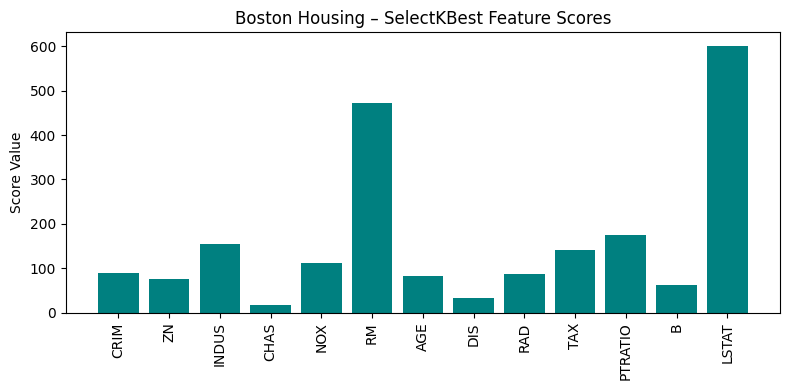

[RFE] Selected 6 features:
  ['NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT']

Overlap between SelectKBest and RFE: 4 features
  ['NOX', 'LSTAT', 'RM', 'PTRATIO']

Iris Dataset – Feature Selection Analysis

[SelectKBest] Selected 3 features:
  ['sepal length', 'petal length', 'petal width']


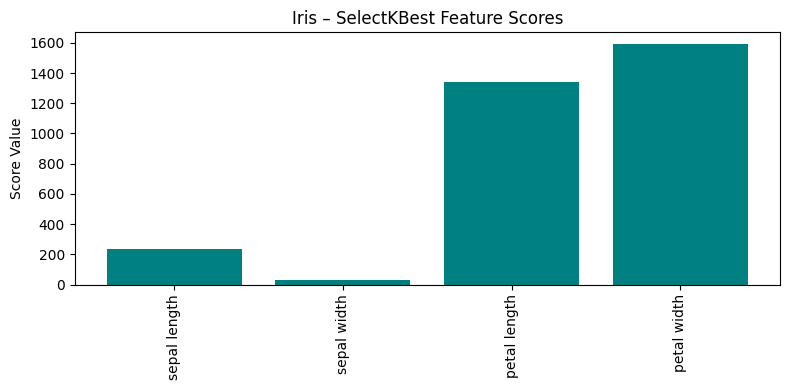

[RFE] Selected 3 features:
  ['sepal length', 'petal length', 'petal width']

Overlap between SelectKBest and RFE: 3 features
  ['petal width', 'sepal length', 'petal length']


In [43]:
for name, df in datasets.items():
    print(f"\n{'='*60}\n{name} Dataset – Feature Selection Analysis")

    possible_targets = ['target', 'class', 'diagnosis', 'Diagnosis', 'species', 'variety', 'MEDV']
    target_col = None
    for col in possible_targets:
        if col in df.columns:
            target_col = col
            break

    if target_col is None:
        raise ValueError(f"No target column found for {name} dataset. Columns = {list(df.columns)}")

    X = df.drop(columns=[target_col])
    y = df[target_col]

    if y.dtype == 'object':
        y = LabelEncoder().fit_transform(y)

    if name == "Breast Cancer":
        score_func = chi2
        model = LogisticRegression(max_iter=2000, solver='liblinear')
        scaler = MinMaxScaler()
    elif name == "Boston Housing":
        score_func = f_regression
        model = LinearRegression()
        scaler = StandardScaler()
    else:
        score_func = f_regression
        model = LinearRegression()
        scaler = StandardScaler()

    X_scaled = scaler.fit_transform(X)

    k = max(3, int(X.shape[1] / 2))

    selector = SelectKBest(score_func=score_func, k=k)
    X_selected = selector.fit_transform(X_scaled, y)
    selected_features = X.columns[selector.get_support()]
    scores = selector.scores_

    print(f"\n[SelectKBest] Selected {len(selected_features)} features:")
    print(" ", list(selected_features))

    plt.figure(figsize=(8, 4))
    plt.bar(X.columns, scores, color='teal')
    plt.xticks(rotation=90)
    plt.title(f"{name} – SelectKBest Feature Scores")
    plt.ylabel("Score Value")
    plt.tight_layout()
    plt.show()

    rfe = RFE(estimator=model, n_features_to_select=k)
    rfe.fit(X_scaled, y)
    rfe_features = X.columns[rfe.support_]

    print(f"[RFE] Selected {len(rfe_features)} features:")
    print(" ", list(rfe_features))

    overlap = set(selected_features) & set(rfe_features)
    print(f"\nOverlap between SelectKBest and RFE: {len(overlap)} features")
    print(" ", list(overlap))

In [44]:
def evaluate_classification(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, pred),
        "F1": f1_score(y_test, pred)
    }

def evaluate_regression(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    return {
        "R²": r2_score(y_test, pred),
        "RMSE": mean_squared_error(y_test, pred, squared=False)
    }

def evaluate_clustering(model, X):
    labels = model.fit_predict(X)
    return {"Silhouette": silhouette_score(X, labels)}

In [45]:
results = {}

for name, df in datasets.items():
    print(f"\n{'='*60}\n{name} – Model Training & Optimization")

    # Auto-detect target column
    possible_targets = ['target', 'class', 'diagnosis', 'Diagnosis', 'species', 'variety', 'MEDV']
    target_col = None
    for col in possible_targets:
        if col in df.columns:
            target_col = col
            break

    if target_col is None:
        raise ValueError(f"No target found for {name}. Columns = {list(df.columns)}")

    X = df.drop(columns=[target_col])
    y = df[target_col]
    if y.dtype == 'object':
        y = LabelEncoder().fit_transform(y)

    # Split only for supervised problems
    if name in ["Breast Cancer", "Boston Housing", "Diabetes"]:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.25, random_state=42
        )
    else:
        X_train, X_test, y_train, y_test = X, X, y, y   # clustering

    # Select Scaler
    scaler = MinMaxScaler() if name == "Breast Cancer" else StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # -------------------- Main Data --------------------
    if name in ["Breast Cancer"]:
        model = RandomForestClassifier(random_state=42)
        res_main = evaluate_classification(model, X_train_scaled, X_test_scaled, y_train, y_test)

    elif name in ["Boston Housing", "Diabetes"]:
        model = RandomForestRegressor(random_state=42)
        res_main = evaluate_regression(model, X_train_scaled, X_test_scaled, y_train, y_test)

    else:
        model = KMeans(n_clusters=3, random_state=42)
        res_main = evaluate_clustering(model, scaler.fit_transform(X))

    # -------------------- PCA Data --------------------
    pca = PCA(n_components=0.95)
    X_pca_train = pca.fit_transform(X_train_scaled)
    X_pca_test = pca.transform(X_test_scaled)

    if name in ["Breast Cancer"]:
        model = RandomForestClassifier(random_state=42)
        res_pca = evaluate_classification(model, X_pca_train, X_pca_test, y_train, y_test)
    elif name in ["Boston Housing", "Diabetes"]:
        model = RandomForestRegressor(random_state=42)
        res_pca = evaluate_regression(model, X_pca_train, X_pca_test, y_train, y_test)
    else:
        model = KMeans(n_clusters=3, random_state=42)
        res_pca = evaluate_clustering(model, X_pca_train)

    # -------------------- Feature-Selected Data --------------------
    k = max(3, int(X.shape[1] / 2))

    if name == "Breast Cancer":
        select = SelectKBest(score_func=chi2, k=k)
        X_sel_train = select.fit_transform(np.abs(X_train_scaled), y_train)
        X_sel_test = select.transform(np.abs(X_test_scaled))
        model = LogisticRegression(max_iter=2000, solver='liblinear')
        res_sel = evaluate_classification(model, X_sel_train, X_sel_test, y_train, y_test)

    elif name in ["Boston Housing", "Diabetes"]:
        select = SelectKBest(score_func=f_regression, k=k)
        X_sel_train = select.fit_transform(X_train_scaled, y_train)
        X_sel_test = select.transform(X_test_scaled)
        model = LinearRegression()
        res_sel = evaluate_regression(model, X_sel_train, X_sel_test, y_train, y_test)

    else:  # Iris or clustering
        select = SelectKBest(score_func=f_regression, k=k)
        X_sel = select.fit_transform(scaler.fit_transform(X), y)
        model = KMeans(n_clusters=3, random_state=42)
        res_sel = evaluate_clustering(model, X_sel)

    results[name] = {"Main": res_main, "PCA": res_pca, "Selected": res_sel}


Breast Cancer – Model Training & Optimization

Boston Housing – Model Training & Optimization

Iris – Model Training & Optimization


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Breast Cancer Results Comparison:
 Main: {'Accuracy': 0.965034965034965, 'F1': 0.9532710280373832}
 PCA: {'Accuracy': 0.958041958041958, 'F1': 0.9444444444444444}
 Selected: {'Accuracy': 0.951048951048951, 'F1': 0.9345794392523364}


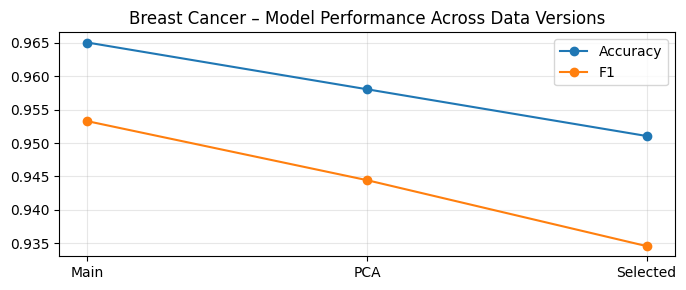


Boston Housing Results Comparison:
 Main: {'R²': 0.8518850999116575, 'RMSE': 3.220568798493019}
 PCA: {'R²': 0.761661161209731, 'RMSE': 4.085362664729067}
 Selected: {'R²': 0.6280941083861223, 'RMSE': 5.103283971906797}


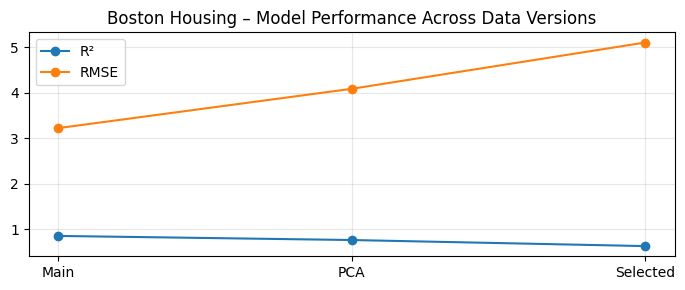


Iris Results Comparison:
 Main: {'Silhouette': 0.4589717867018717}
 PCA: {'Silhouette': 0.5081546339516393}
 Selected: {'Silhouette': 0.5385207282738432}


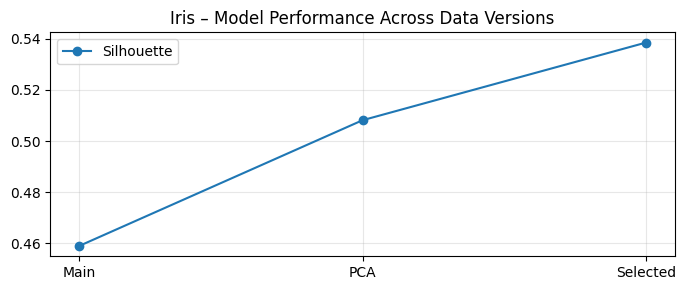

In [46]:
for name, metrics in results.items():
    print(f"\n{name} Results Comparison:")
    for version, vals in metrics.items():
        print(f" {version}: {vals}")

    plt.figure(figsize=(7, 3))
    keys = list(metrics["Main"].keys())
    for k in keys:
        vals = [metrics[v].get(k, np.nan) for v in metrics]
        plt.plot(["Main", "PCA", "Selected"], vals, marker='o', label=k)
    plt.title(f"{name} – Model Performance Across Data Versions")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()